In [2]:
import tensorflow as tf
from keras import layers
from tensorflow import keras 
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
inner_folders = ['cat', 'rabbit']
outer_folders = ['train-cat-rabbit','test-images']
train_cats_path = '/kaggle/input/cat-vs-rabbit/train-cat-rabbit/cat'
train_rabbits_path = '/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit'
test_cats_path = '/kaggle/input/cat-vs-rabbit/test-images/cat'
test_rabbits_path = '/kaggle/input/cat-vs-rabbit/test-images/rabbit'

X1 = []
X2 = []
X3 = []
X4 = []
Y = []
for filename in os.listdir(train_cats_path):
    img = cv2.imread(os.path.join(train_cats_path,filename))
    img = cv2.resize(img,(200,200))
    X1.append(img)


for filename2 in os.listdir(train_rabbits_path):
    img1 = cv2.imread(os.path.join(train_rabbits_path,filename2))
    img1 = cv2.resize(img1,(200,200))
    X2.append(img)


for filename3 in os.listdir(test_cats_path):
    img = cv2.imread(os.path.join(test_cats_path,filename3))
    img = cv2.resize(img,(200,200))
    X3.append(img)


for filename4 in os.listdir(test_rabbits_path):
    img1 = cv2.imread(os.path.join(test_rabbits_path,filename4))
    img1 = cv2.resize(img1,(200,200))
    X4.append(img)
# Convert to array    
X1 = np.asarray(X1)    
X2 = np.asarray(X2)
X3 = np.asarray(X3)    
X4 = np.asarray(X4)

In [4]:
X = np.concatenate((X1,X3,X2,X4), axis = 0)

zero = np.zeros(X1.shape[0] + X3.shape[0])
one = np.ones(X2.shape[0] + X4.shape[0])

Y = np.concatenate((zero,one), axis = 0)

In [5]:
X = np.asarray(X) 

Y = np.asarray(Y) 


print(X.shape)
print(Y.shape)

cats_train,cats_test,rabbits_train,rabbits_test = train_test_split(X,Y,test_size = 0.2,random_state=42)
print('X.train shape:',cats_train.shape)
print('X.test shape:',cats_test.shape)
print('Y.train shape:',rabbits_train.shape)
print('Y.test shape:',rabbits_test.shape)

(1615, 200, 200, 3)
(1615,)
X.train shape: (1292, 200, 200, 3)
X.test shape: (323, 200, 200, 3)
Y.train shape: (1292,)
Y.test shape: (323,)


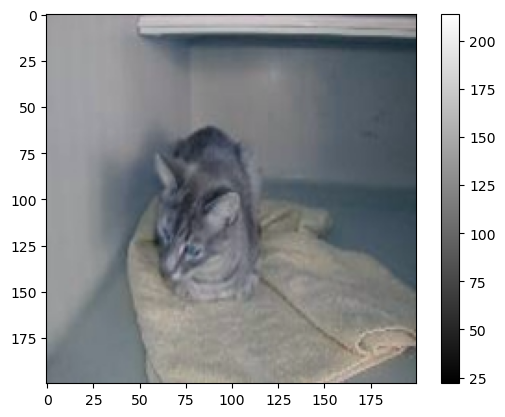

In [6]:
plt.imshow(cats_train[3],cmap='gray')
plt.colorbar()
plt.show()


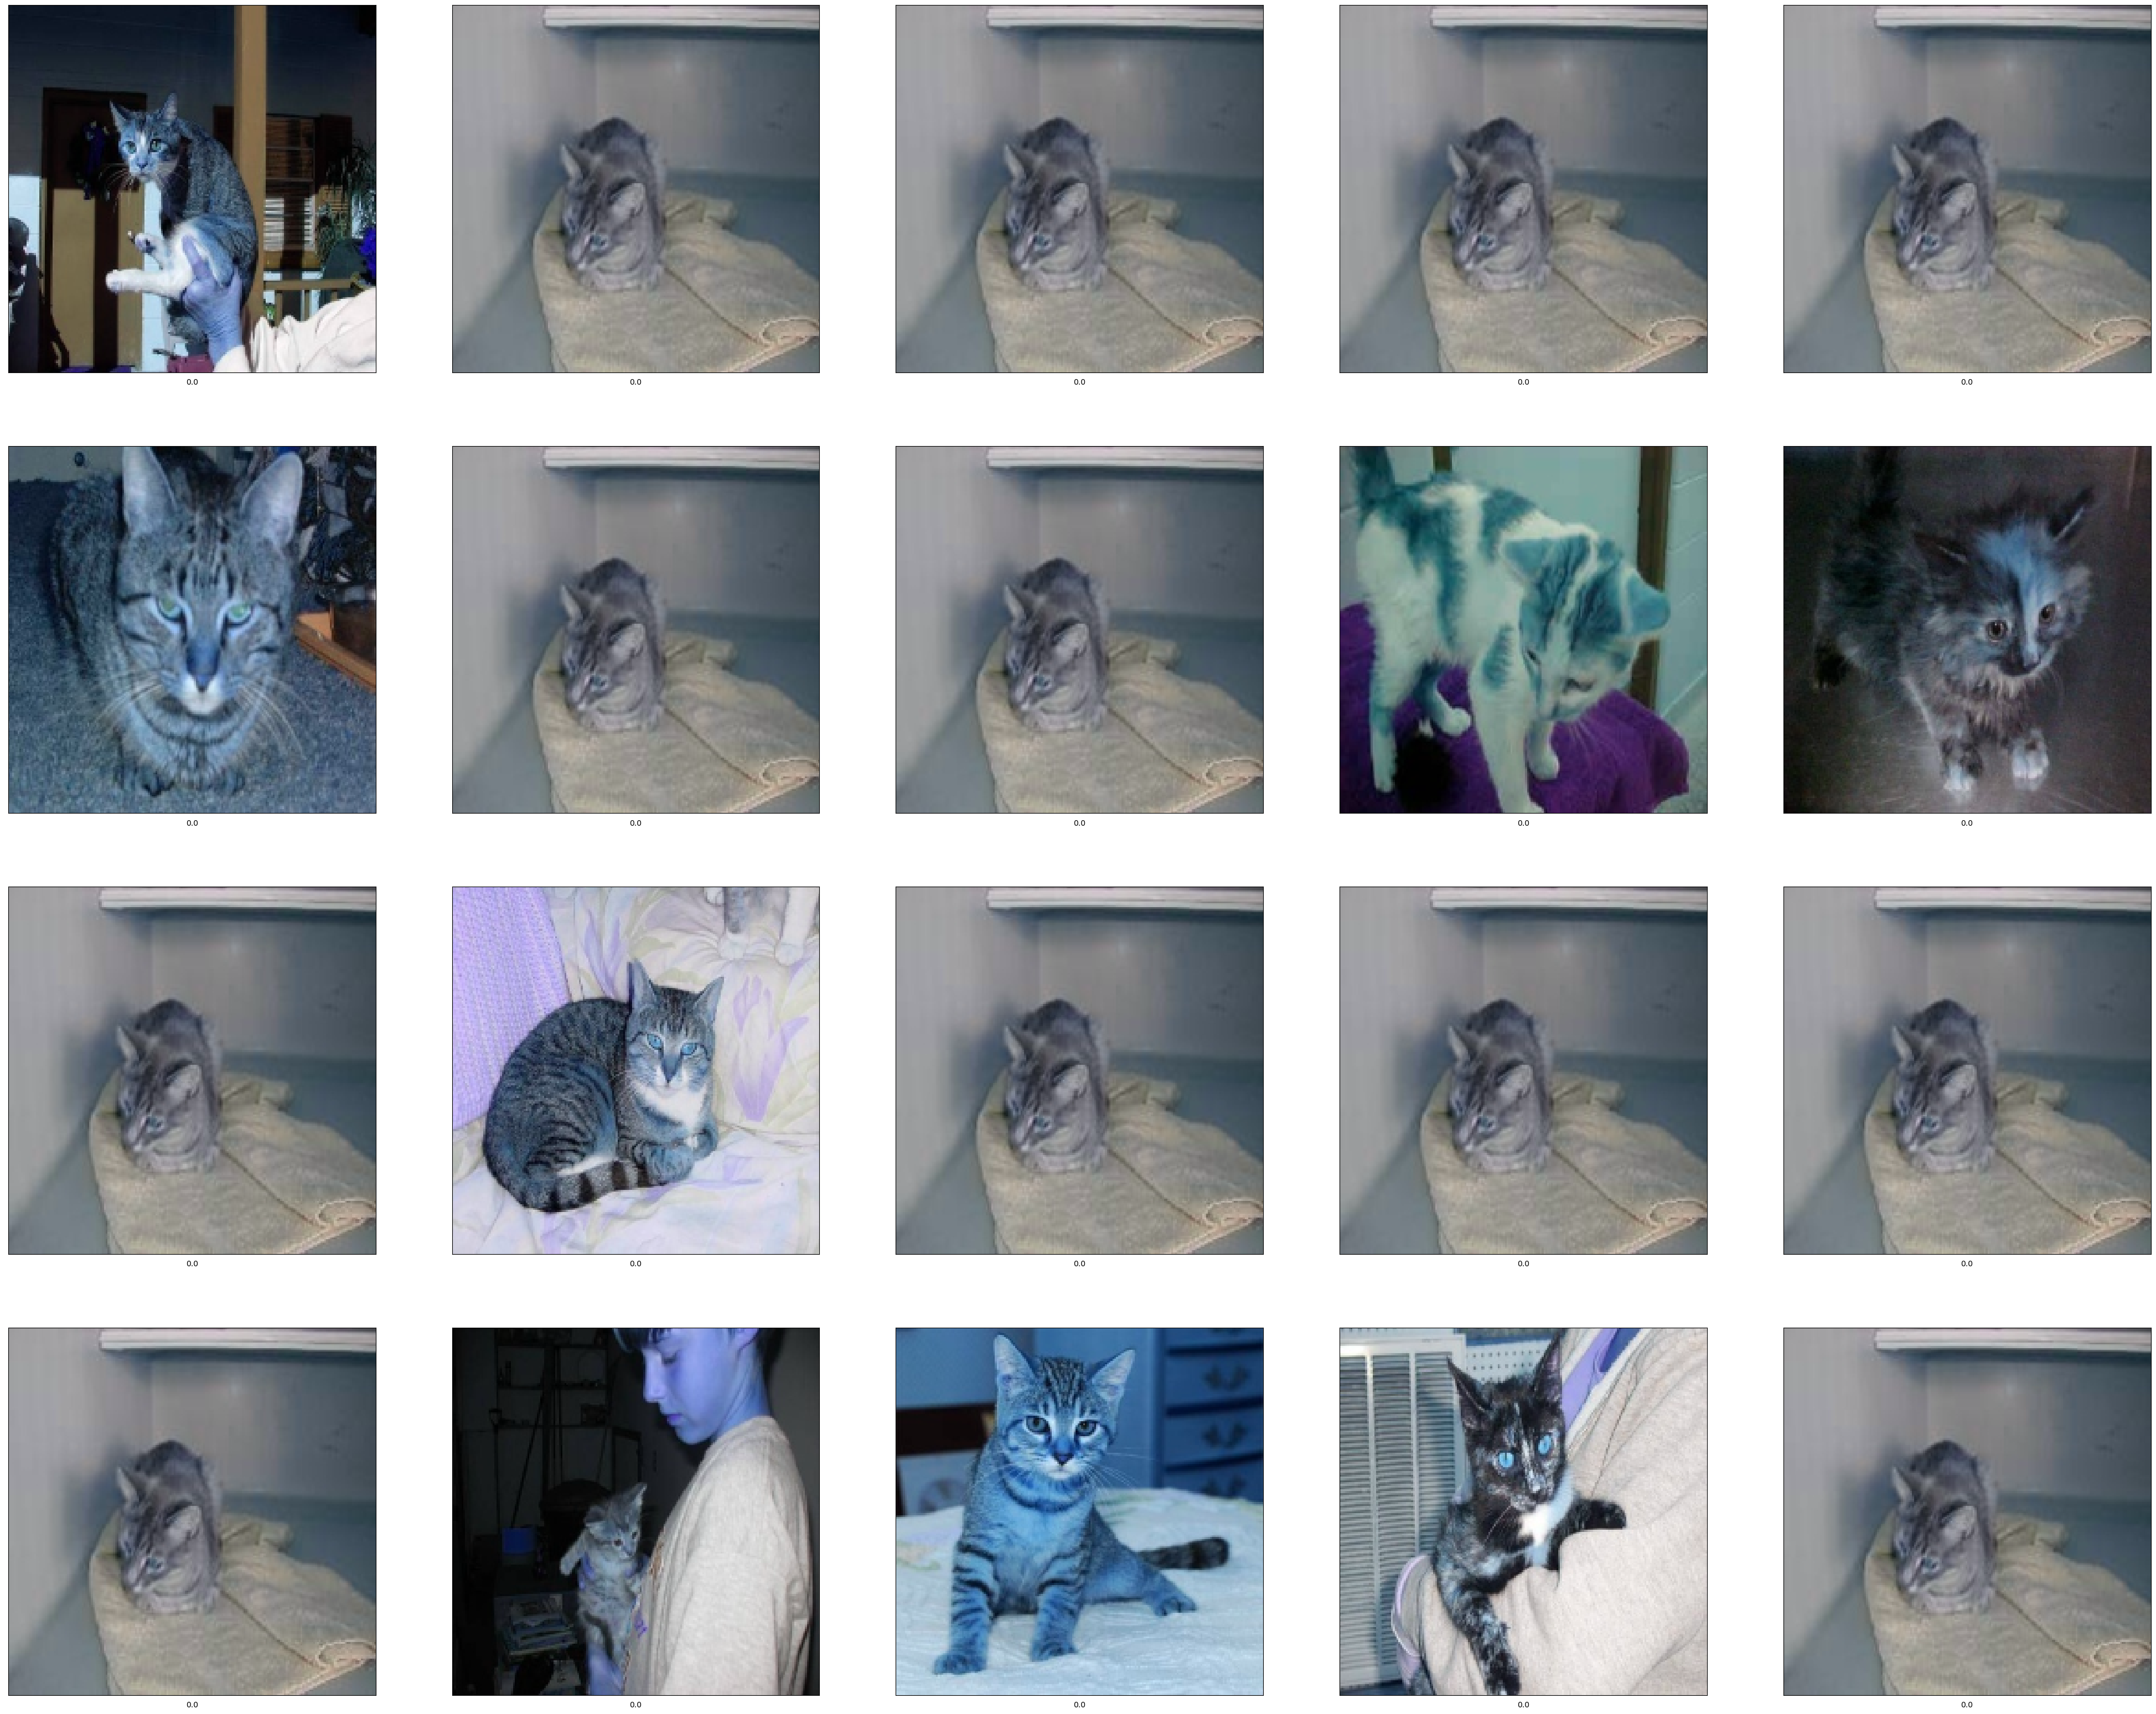

In [7]:
plt.figure(figsize=(50,50))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cats_train[i])
    plt.xlabel(Y[i])
plt.show()

In [8]:

model = keras.Sequential([
    layers.Flatten(input_shape=cats_train[0].shape),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(2,activation='sigmoid'),
])

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(cats_train,rabbits_train,epochs=5,batch_size=1)

Epoch 1/5
1292/1292 [==============================] - 484s 374ms/step - loss: 301.0430 - accuracy: 0.9512
Epoch 2/5
1292/1292 [==============================] - 486s 376ms/step - loss: 0.8726 - accuracy: 0.9814
Epoch 3/5
1292/1292 [==============================] - 489s 378ms/step - loss: 0.0690 - accuracy: 0.9915
Epoch 4/5
1292/1292 [==============================] - 486s 376ms/step - loss: 0.0492 - accuracy: 0.9915
Epoch 5/5
1292/1292 [==============================] - 487s 377ms/step - loss: 0.0450 - accuracy: 0.9915


In [12]:
val_loss,val_acc = model.evaluate(cats_test,rabbits_test)
print(val_loss)
print(val_acc)

11/11 [==============================] - 1s 35ms/step - loss: 0.0806 - accuracy: 0.9814
0.08055543154478073
0.9814241528511047
